<a href="https://colab.research.google.com/github/Befezdow/ai_test/blob/master/data_playing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача отчасти вырождена и состоит в предсказании пола человека проходившего ЭКГ по его возрасту и 5000 значений второго показателя ЭКГ. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [0]:
url = 'https://gitlab.com/Befezdow/files_storage/raw/master/data.csv'
data = pd.read_csv(url, sep=',', header=None,  engine='python')

Задаем заголовки для фрейма (t0-t4999 - значения показателя ЭКГ):

In [0]:
data.columns = ['gender', 'age', *['t{}'.format(i) for i in range(5000)]]

In [0]:
type(data)

pandas.core.frame.DataFrame

In [0]:
data

,gender,age,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,...,t4960,t4961,t4962,t4963,t4964,t4965,t4966,t4967,t4968,t4969,t4970,t4971,t4972,t4973,t4974,t4975,t4976,t4977,t4978,t4979,t4980,t4981,t4982,t4983,t4984,t4985,t4986,t4987,t4988,t4989,t4990,t4991,t4992,t4993,t4994,t4995,t4996,t4997,t4998,t4999
0,Female,34.0,0.027395,0.019124,0.008969,-0.017037,-0.023797,-0.014924,-0.039989,-0.046270,-0.029612,-0.036815,-0.072590,-0.073762,-0.078451,-0.101827,-0.106642,-0.103792,-0.091001,-0.098462,-0.083764,-0.082784,-0.112712,-0.140969,-0.119474,-0.103822,-0.109944,-0.105871,-0.096122,-0.113779,-0.138035,-0.089373,-0.093503,-0.089272,-0.070199,-0.038321,-0.043485,-0.049732,-0.027321,0.016859,...,0.007368,-0.005077,0.002563,0.004948,-0.010149,-0.020083,-0.017064,-0.021302,-0.023173,-0.024874,-0.041748,-0.035991,-0.060465,-0.074547,-0.027259,-0.019131,-0.049771,-0.062158,-0.074858,-0.065321,-0.050152,-0.063890,-0.066167,-0.068009,-0.104224,-0.067623,-0.065377,-0.048215,-0.034106,-0.044533,-0.052378,-0.035892,-0.026824,-0.086302,-0.080541,-0.021256,-0.023393,-0.061131,-0.065488,-0.050432
1,Female,62.0,-0.032760,-0.049867,-0.040492,-0.036949,-0.036685,-0.036168,-0.026948,-0.023845,-0.024784,-0.028407,-0.024150,-0.021389,-0.021446,-0.016496,-0.013692,-0.014674,-0.009303,-0.002954,-0.004879,0.006770,0.011216,-0.001854,0.003841,0.016243,0.018630,0.021178,0.031212,0.034202,0.040565,0.046965,0.054428,0.056850,0.070728,0.076864,0.073784,0.081556,0.091702,0.094171,...,-0.081999,-0.084778,-0.084932,-0.082419,-0.084306,-0.082399,-0.086867,-0.092798,-0.084933,-0.081508,-0.086315,-0.084586,-0.077185,-0.086332,-0.095466,-0.091081,-0.087424,-0.084234,-0.084968,-0.091833,-0.092898,-0.086834,-0.084752,-0.099358,-0.112348,-0.126535,-0.135112,-0.135151,-0.127825,-0.134854,-0.136229,-0.119681,-0.107142,-0.098217,-0.062580,0.008506,0.106913,0.216822,0.348727,0.509777
2,Female,76.0,-0.106124,-0.107124,-0.110124,-0.111124,-0.113124,-0.114124,-0.114124,-0.111124,-0.108124,-0.103124,-0.098125,-0.093124,-0.090124,-0.087124,-0.085125,-0.086124,-0.087124,-0.089124,-0.091124,-0.092124,-0.092124,-0.092124,-0.092124,-0.091124,-0.089124,-0.087124,-0.087124,-0.085125,-0.083125,-0.082125,-0.080125,-0.079125,-0.077124,-0.077124,-0.077124,-0.079125,-0.082125,-0.086124,...,-0.029125,-0.031125,-0.032125,-0.034124,-0.034124,-0.035125,-0.037124,-0.035125,-0.036125,-0.037124,-0.038124,-0.038124,-0.040125,-0.042125,-0.044124,-0.044124,-0.040125,-0.038124,-0.034124,-0.031125,-0.028125,-0.025125,-0.020125,-0.017125,-0.015125,-0.014124,-0.011125,-0.009125,-0.007125,-0.007125,-0.006124,-0.007125,-0.007125,-0.007125,-0.008124,-0.011125,-0.014124,-0.016124,-0.017125,-0.020125
3,Female,46.0,0.000892,0.001268,0.001148,0.001214,0.001173,0.001199,0.001183,0.001193,0.001187,0.001190,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,...,0.074157,0.100034,0.104672,0.096523,0.092344,0.093972,0.101647,0.112536,0.109279,0.091944,0.090363,0.104183,0.102147,0.083996,0.094278,0.116800,0.117310,0.104896,0.096999,0.106877,0.125748,0.134151,0.125484,0.093989,0.081957,0.086953,0.086703,0.099876,0.096882,0.105523,0.103956,0.082254,0.081412,0.094791,0.104279,0.099288,0.095195,0.101109,0.095179,0.058680
4,Female,28.0,-0.055538,-0.074348,-0.064000,-0.068945,-0.063035,-0.057369,-0.060522,-0.068088,-0.074217,-0.070541,-0.058647,-0.060224,-0.066568,-0.085502,-0.109971,-0.100629,-0.092675,-0.060285,0.010678,0.094841,0.154642,0.197565,0.256100,0.321843,0.404810,0.483111,0.550180,0.639253,0.732479,0.764754,0.705645,0.610163,0.503144,0.378424,0.262757,0.173030,0.106225,0.048973,...,0.050955,0.046786,0.041206,0.036573,0.031128,0.026924,0.025585,0.023635,0.024275,0.026511,0.018790,0.018184,0.015767,0.003460,0.001020,-0.00

In [0]:
print(data)

      gender   age        t0        t1  ...     t4996     t4997     t4998     t4999
0     Female  34.0  0.027395  0.019124  ... -0.023393 -0.061131 -0.065488 -0.050432
1     Female  62.0 -0.032760 -0.049867  ...  0.106913  0.216822  0.348727  0.509777
2     Female  76.0 -0.106124 -0.107124  ... -0.014124 -0.016124 -0.017125 -0.020125
3     Female  46.0  0.000892  0.001268  ...  0.095195  0.101109  0.095179  0.058680
4     Female  28.0 -0.055538 -0.074348  ... -0.024078 -0.023262 -0.024008 -0.019174
5     Female  55.0 -0.004116 -0.012364  ... -0.007765 -0.009575 -0.005273 -0.008988
6       Male  59.0 -0.034434 -0.036747  ... -0.025894 -0.016499 -0.011733 -0.015949
7       Male  64.0  0.052680  0.082691  ...  0.002881  0.001513 -0.003648 -0.003240
8     Female  74.0  0.002313  0.011058  ... -0.047647 -0.027327 -0.019686 -0.029885
9     Female  27.0 -0.048001 -0.066751  ... -0.092437 -0.092026 -0.089741 -0.082927
10    Female  87.0 -0.019404 -0.034050  ...  0.001947 -0.008083 -0.005602 -0

In [0]:
data.head()

,gender,age,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,...,t4960,t4961,t4962,t4963,t4964,t4965,t4966,t4967,t4968,t4969,t4970,t4971,t4972,t4973,t4974,t4975,t4976,t4977,t4978,t4979,t4980,t4981,t4982,t4983,t4984,t4985,t4986,t4987,t4988,t4989,t4990,t4991,t4992,t4993,t4994,t4995,t4996,t4997,t4998,t4999
0,Female,34.0,0.027395,0.019124,0.008969,-0.017037,-0.023797,-0.014924,-0.039989,-0.046270,-0.029612,-0.036815,-0.072590,-0.073762,-0.078451,-0.101827,-0.106642,-0.103792,-0.091001,-0.098462,-0.083764,-0.082784,-0.112712,-0.140969,-0.119474,-0.103822,-0.109944,-0.105871,-0.096122,-0.113779,-0.138035,-0.089373,-0.093503,-0.089272,-0.070199,-0.038321,-0.043485,-0.049732,-0.027321,0.016859,...,0.007368,-0.005077,0.002563,0.004948,-0.010149,-0.020083,-0.017064,-0.021302,-0.023173,-0.024874,-0.041748,-0.035991,-0.060465,-0.074547,-0.027259,-0.019131,-0.049771,-0.062158,-0.074858,-0.065321,-0.050152,-0.063890,-0.066167,-0.068009,-0.104224,-0.067623,-0.065377,-0.048215,-0.034106,-0.044533,-0.052378,-0.035892,-0.026824,-0.086302,-0.080541,-0.021256,-0.023393,-0.061131,-0.065488,-0.050432
1,Female,62.0,-0.032760,-0.049867,-0.040492,-0.036949,-0.036685,-0.036168,-0.026948,-0.023845,-0.024784,-0.028407,-0.024150,-0.021389,-0.021446,-0.016496,-0.013692,-0.014674,-0.009303,-0.002954,-0.004879,0.006770,0.011216,-0.001854,0.003841,0.016243,0.018630,0.021178,0.031212,0.034202,0.040565,0.046965,0.054428,0.056850,0.070728,0.076864,0.073784,0.081556,0.091702,0.094171,...,-0.081999,-0.084778,-0.084932,-0.082419,-0.084306,-0.082399,-0.086867,-0.092798,-0.084933,-0.081508,-0.086315,-0.084586,-0.077185,-0.086332,-0.095466,-0.091081,-0.087424,-0.084234,-0.084968,-0.091833,-0.092898,-0.086834,-0.084752,-0.099358,-0.112348,-0.126535,-0.135112,-0.135151,-0.127825,-0.134854,-0.136229,-0.119681,-0.107142,-0.098217,-0.062580,0.008506,0.106913,0.216822,0.348727,0.509777
2,Female,76.0,-0.106124,-0.107124,-0.110124,-0.111124,-0.113124,-0.114124,-0.114124,-0.111124,-0.108124,-0.103124,-0.098125,-0.093124,-0.090124,-0.087124,-0.085125,-0.086124,-0.087124,-0.089124,-0.091124,-0.092124,-0.092124,-0.092124,-0.092124,-0.091124,-0.089124,-0.087124,-0.087124,-0.085125,-0.083125,-0.082125,-0.080125,-0.079125,-0.077124,-0.077124,-0.077124,-0.079125,-0.082125,-0.086124,...,-0.029125,-0.031125,-0.032125,-0.034124,-0.034124,-0.035125,-0.037124,-0.035125,-0.036125,-0.037124,-0.038124,-0.038124,-0.040125,-0.042125,-0.044124,-0.044124,-0.040125,-0.038124,-0.034124,-0.031125,-0.028125,-0.025125,-0.020125,-0.017125,-0.015125,-0.014124,-0.011125,-0.009125,-0.007125,-0.007125,-0.006124,-0.007125,-0.007125,-0.007125,-0.008124,-0.011125,-0.014124,-0.016124,-0.017125,-0.020125
3,Female,46.0,0.000892,0.001268,0.001148,0.001214,0.001173,0.001199,0.001183,0.001193,0.001187,0.001190,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,0.001189,...,0.074157,0.100034,0.104672,0.096523,0.092344,0.093972,0.101647,0.112536,0.109279,0.091944,0.090363,0.104183,0.102147,0.083996,0.094278,0.116800,0.117310,0.104896,0.096999,0.106877,0.125748,0.134151,0.125484,0.093989,0.081957,0.086953,0.086703,0.099876,0.096882,0.105523,0.103956,0.082254,0.081412,0.094791,0.104279,0.099288,0.095195,0.101109,0.095179,0.058680
4,Female,28.0,-0.055538,-0.074348,-0.064000,-0.068945,-0.063035,-0.057369,-0.060522,-0.068088,-0.074217,-0.070541,-0.058647,-0.060224,-0.066568,-0.085502,-0.109971,-0.100629,-0.092675,-0.060285,0.010678,0.094841,0.154642,0.197565,0.256100,0.321843,0.404810,0.483111,0.550180,0.639253,0.732479,0.764754,0.705645,0.610163,0.503144,0.378424,0.262757,0.173030,0.106225,0.048973,...,0.050955,0.046786,0.041206,0.036573,0.031128,0.026924,0.025585,0.023635,0.024275,0.026511,0.018790,0.018184,0.015767,0.003460,0.001020,-0.00

In [0]:
data.tail()

,gender,age,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,...,t4960,t4961,t4962,t4963,t4964,t4965,t4966,t4967,t4968,t4969,t4970,t4971,t4972,t4973,t4974,t4975,t4976,t4977,t4978,t4979,t4980,t4981,t4982,t4983,t4984,t4985,t4986,t4987,t4988,t4989,t4990,t4991,t4992,t4993,t4994,t4995,t4996,t4997,t4998,t4999
1995,Female,32.0,-0.018141,-0.023955,-0.006502,-0.000653,0.014613,0.001626,-0.028503,-0.034765,-0.019202,-0.014511,-0.039193,-0.032236,0.001602,-0.004626,-0.036828,-0.060125,-0.059007,-0.037537,-0.024292,-0.016468,-0.034331,-0.031291,-0.017263,-0.021119,-0.012675,-0.033426,-0.041115,-0.048005,-0.049478,-0.042927,-0.025569,-0.030460,-0.023241,-0.004727,0.005013,0.011111,0.006158,-0.018924,...,0.084215,0.060994,0.065774,0.071868,0.073578,0.079394,0.098463,0.105383,0.090878,0.074087,0.085558,0.115412,0.124078,0.097663,0.075524,0.064851,0.080159,0.092464,0.096830,0.101946,0.090537,0.088190,0.102909,0.099366,0.109333,0.117117,0.105888,0.103852,0.111997,0.085930,0.057881,0.059065,0.067037,0.062550,0.069610,0.078601,0.066483,0.060625,0.054585,0.048672
1996,Female,22.0,-0.105717,-0.107717,-0.107717,-0.105717,-0.104717,-0.108717,-0.107717,-0.107717,-0.111717,-0.110717,-0.112717,-0.110717,-0.112717,-0.112717,-0.113717,-0.112717,-0.110717,-0.111717,-0.109717,-0.109717,-0.107717,-0.107717,-0.108717,-0.108717,-0.106717,-0.106717,-0.108717,-0.107717,-0.104717,-0.104717,-0.105717,-0.105717,-0.102717,-0.100717,-0.100717,-0.097717,-0.098717,-0.094717,...,-0.017717,-0.013717,-0.011717,-0.007717,-0.005717,-0.001717,0.000283,0.003283,0.004283,0.006283,0.008283,0.010283,0.013283,0.015283,0.017283,0.018283,0.019283,0.021283,0.023283,0.023283,0.023283,0.020283,0.018283,0.016283,0.015283,0.013283,0.012283,0.011283,0.012283,0.010283,0.011283,0.009283,0.006283,0.005283,0.002283,-0.000717,-0.003717,-0.006717,-0.007717,-0.008717
1997,Female,67.0,0.036721,0.042721,0.046721,0.049721,0.048721,0.044721,0.040721,0.039721,0.040721,0.041721,0.045721,0.046721,0.046721,0.046721,0.047721,0.048721,0.046721,0.042721,0.038721,0.038721,0.040721,0.044721,0.046721,0.041721,0.031721,0.019721,0.010721,0.003721,0.001721,0.000721,0.002721,0.001721,0.000721,0.001721,0.002721,0.004721,0.008721,0.009721,...,-0.156279,-0.159279,-0.168279,-0.181279,-0.197279,-0.211279,-0.224279,-0.231279,-0.235279,-0.235279,-0.236279,-0.237279,-0.241279,-0.241279,-0.239279,-0.235279,-0.233279,-0.234279,-0.237279,-0.241279,-0.242279,-0.240279,-0.234279,-0.229279,-0.226279,-0.222279,-0.218279,-0.209279,-0.200279,-0.194279,-0.193279,-0.197279,-0.200279,-0.202279,-0.201279,-0.194279,-0.186279,-0.180279,-0.178279,-0.181279
1998,Female,77.0,-0.136186,-0.166391,-0.114026,-0.109226,-0.082460,-0.046725,-0.019311,-0.007972,0.015253,0.025517,0.018156,0.016158,0.022925,0.015195,0.010976,0.025721,0.030907,0.032862,0.043626,0.040944,0.025772,0.023434,0.025229,0.013273,0.007640,0.020654,0.025626,0.030432,0.052912,0.062979,0.050972,0.045047,0.045579,0.032827,0.023440,0.035358,0.043008,0.045738,...,0.098693,0.098653,0.106106,0.098630,0.090641,0.086600,0.076298,0.061304,0.057983,0.058269,0.051131,0.048261,0.051241,0.040748,0.028011,0.023390,0.015174,0.002512,0.002669,0.005483,0.000239,0.003257,0.010467,0.008074,0.002809,-0.002403,-0.014426,-0.029684,-0.030053,-0.019877,-0.015212,-0.006725,0.003452,-0.002088,-0.009879,-0.007249,-0.004867,-0.015106,-0.016701,-0.019137
1999,Female,57.0,-0.008761,-0.016738,-0.014933,-0.008678,-0.005581,-0.008739,-0.011622,-0.010406,-0.008986,-0.013391,-0.013596,-0.015619,-0.016326,-0.016613,-0.019633,-0.020964,-0.016494,-0.016832,-0.018884,-0.018778,-0.018555,-0.021083,-0.026050,-0.024666,-0.023174,-0.026642,-0.028329,-0.026611,-0.029510,-0.033762,-0.038470,-0.041137,-0.046409,-0.044507,-0.043935,-0.043454,-0.041364,-0.048962,...,0.162902,0.172557,0.184988,0.191231,0.190001,0.200195,0.215377,0.225512,0.237994,0.253365,0.261107,0.266395,0.275614,0.281597,0.290818,0.294600,0.296905,0.308756,0.32

In [0]:
print(data.shape)
print(data.columns)

(2000, 5002)
Index(['gender', 'age', 't0', 't1', 't2', 't3', 't4', 't5', 't6', 't7',
       ...
       't4990', 't4991', 't4992', 't4993', 't4994', 't4995', 't4996', 't4997',
       't4998', 't4999'],
      dtype='object', length=5002)


In [0]:
data.index

RangeIndex(start=0, stop=2000, step=1)

In [0]:
data['age']

0       34.0
1       62.0
2       76.0
3       46.0
4       28.0
5       55.0
6       59.0
7       64.0
8       74.0
9       27.0
10      87.0
11      77.0
12      64.0
13      73.0
14      68.0
15      37.0
16      65.0
17      59.0
18      82.0
19      65.0
20      19.0
21      71.0
22      78.0
23      67.0
24      55.0
25      29.0
26      48.0
27      85.0
28      71.0
29      75.0
        ... 
1970    56.0
1971    29.0
1972    32.0
1973    62.0
1974    84.0
1975    48.0
1976    86.0
1977    48.0
1978    57.0
1979    29.0
1980    88.0
1981    94.0
1982    29.0
1983    90.0
1984    80.0
1985    77.0
1986    64.0
1987    49.0
1988    49.0
1989    70.0
1990    39.0
1991    14.0
1992    56.0
1993    55.0
1994    85.0
1995    32.0
1996    22.0
1997    67.0
1998    77.0
1999    57.0
Name: age, Length: 2000, dtype: float64

In [0]:
data['age'].dtype.name

'float64'

In [0]:
type(data['age'][3])

numpy.float64

In [0]:
type(data['age'])

pandas.core.series.Series

In [0]:
data[['gender', 'age']].head()

,gender,age
0,Female,34.0
1,Female,62.0
2,Female,76.0
3,Female,46.0
4,Female,28.0


Смотрим среднеквадратичное отклонение, мат. ожидание и квантили:

In [0]:
data.describe()

,age,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,...,t4960,t4961,t4962,t4963,t4964,t4965,t4966,t4967,t4968,t4969,t4970,t4971,t4972,t4973,t4974,t4975,t4976,t4977,t4978,t4979,t4980,t4981,t4982,t4983,t4984,t4985,t4986,t4987,t4988,t4989,t4990,t4991,t4992,t4993,t4994,t4995,t4996,t4997,t4998,t4999
count,1997.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1996.000000
mean,60.782173,-0.003043,-0.005281,-0.004692,-0.004749,-0.004698,-0.004657,-0.003851,-0.003224,-0.002624,-0.002023,-0.001579,0.014823,-0.001770,0.014213,-0.002583,-0.002924,-0.003228,-0.003181,-0.002821,-0.002256,-0.001829,-0.001349,-0.000754,0.000061,0.000547,0.000613,0.000787,0.000831,0.000817,0.001133,0.001667,0.001675,0.001903,0.002107,0.002462,0.002547,0.002798,0.003609,0.003918,...,-0.002208,-0.001859,-0.001321,-0.000951,-0.000783,-0.000349,-0.000019,0.000313,0.000956,0.001784,0.002698,0.003116,0.003531,0.003669,0.003309,0.002895,0.002683,0.002297,0.002448,0.002113,0.001482,0.000891,0.000067,-0.000417,-0.000433,-0.000405,-0.000410,0.016025,0.000011,0.000503,0.000629,0.000674,0.001392,0.002175,0.002960,0.004159,0.005326,0.006801,0.008434,0.009169
std,19.121543,0.136975,0.161146,0.151787,0.156356,0.153504,0.155306,0.155027,0.156807,0.158354,0.160862,0.162761,0.750696,0.163232,0.750523,0.161461,0.160283,0.160407,0.161785,0.163949,0.166227,0.168147,0.170018,0.171947,0.174492,0.177051,0.178870,0.180525,0.182791,0.185389,0.187041,0.186641,0.184547,0.182827,0.182621,0.181788,0.180247,0.179039,0.178367,0.177652,...,0.150676,0.151400,0.152685,0.153788,0.155773,0.158896,0.162021,0.164773,0.167085,0.168684,0.169203,0.167756,0.165604,0.164186,0.163857,0.164142,0.164935,0.165763,0.166848,0.167011,0.164933,0.161991,0.158698,0.155398,0.152100,0.149605,0.148273,0.746222,0.148818,0.149782,0.150271,0.151570,0.153900,0.156916,0.159809,0.165286,0.169806,0.175520,0.176263,0.180054
min,2.000000,-1.548534,-1.533534,-1.521534,-1.512534,-1.505534,-1.504534,-1.503534,-1.502534,-1.494534,-1.475534,-1.458534,-1.447534,-1.441534,-1.436534,-1.431534,-1.422534,-1.410534,-1.396534,-1.377534,-1.347534,-1.318534,-1.297534,-1.288534,-1.292534,-1.299534,-1.307534,-1.303534,-1.285534,-1.256534,-1.219534,-1.186534,-1.169534,-1.164534,-1.166534,-1.170534,-1.178554,-1.216181,-1.260816,-1.298081,...,-1.091365,-1.092962,-1.081818,-1.082325,-1.092267,-1.094301,-1.181069,-1.337829,-1.476951,-1.556771,-1.594704,-1.579733,-1.536673,-1.499597,-1.450177,-1.390587,-1.322480,-1.242039,-1.140882,-1.140459,-1.155086,-1.145562,-1.132564,-1.137546,-1.145342,-1.145282,-1.151132,-1.157682,-1.165593,-1.180648,-1.193288,-1.186256,-1.144057,-1.105981,-1.084433,-1.127472,-1.115263,-1.148929,-1.089428,-1.210832
25%,49.000000,-0.050824,-0.060345,-0.057559,-0.060378,-0.058967,-0.059664,-0.058049,-0.059033,-0.058744,-0.058993,-0.059004,-0.059189,-0.059501,-0.058558,-0.060040,-0.059103,-0.057442,-0.057705,-0.058090,-0.058102,-0.058036,-0.058329,-0.057249,-0.057368,-0.058103,-0.057925,-0.060081,-0.059223,-0.059275,-0.058207,-0.056616,-0.058179,-0.

Попарные графики для первых 25 атрибутов:

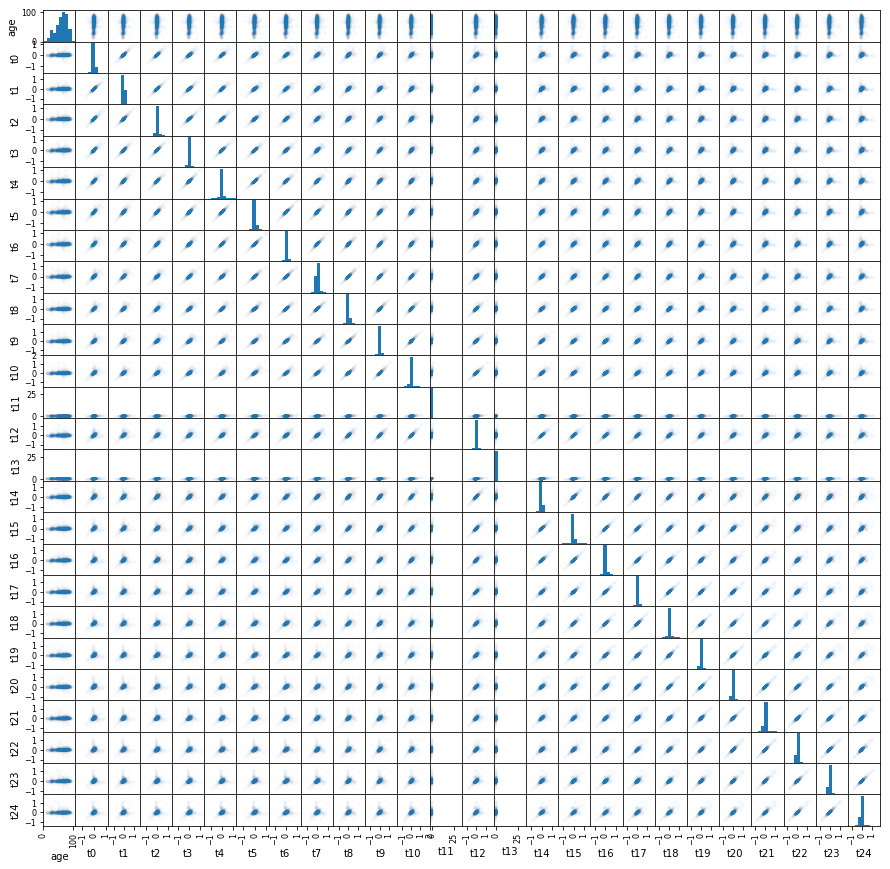

In [0]:
from pandas.plotting import scatter_matrix
modified_data = data.drop(['t{}'.format(i) for i in range(25, 5000)], 1)
scatter_matrix(modified_data, alpha = .01, figsize = (15, 15))
pass

Смотрим корреляцию первых 100 атрибутов:

In [0]:
modified_data = data.drop(['t{}'.format(i) for i in range(100, 5000)], 1)
modified_data.corr()

,age,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,...,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99
age,1.000000,0.042893,0.037158,0.032978,0.031811,0.032459,0.033065,0.034659,0.037720,0.037754,0.033943,0.030463,0.004278,0.027446,0.034484,0.023190,0.021233,0.019959,0.015396,0.011640,0.006467,-0.000550,-0.007848,-0.014427,-0.021183,-0.026011,-0.027697,-0.031963,-0.038893,-0.044362,-0.045813,-0.042538,-0.034464,-0.024837,-0.015223,-0.003475,0.011183,0.024425,0.032764,0.038708,...,0.006775,-0.000309,-0.008009,-0.013816,-0.017011,-0.016366,-0.013431,-0.009881,-0.001107,0.007908,0.014832,0.020322,0.025063,0.026891,0.024239,0.019838,0.015454,0.011190,0.003529,-0.003857,-0.007467,-0.011403,-0.013764,-0.015125,-0.014739,-0.013449,-0.016285,-0.017769,-0.018159,0.007375,-0.014951,-0.008668,-0.003955,-0.002790,-0.001020,0.000532,0.000576,0.003163,0.007364,0.009991
t0,0.042893,1.000000,0.976737,0.958840,0.925695,0.882528,0.832275,0.774072,0.715106,0.651450,0.592466,0.540046,0.116068,0.459933,0.068581,0.409323,0.390764,0.375813,0.361523,0.345974,0.329736,0.315851,0.302104,0.287824,0.275245,0.262744,0.252478,0.242932,0.231590,0.218239,0.208659,0.204124,0.203326,0.204757,0.205422,0.204270,0.204469,0.204485,0.204649,0.202912,...,0.186718,0.186809,0.184941,0.184536,0.185267,0.182822,0.181105,0.179420,0.176535,0.174029,0.169286,0.159276,0.148579,0.137192,0.126528,0.115688,0.107123,0.098973,0.090115,0.083393,0.077792,0.070604,0.064855,0.061191,0.059193,0.059660,0.059121,0.055838,0.052084,0.005973,0.050507,0.050669,0.054219,0.058057,0.060657,0.064382,0.069160,0.073493,0.075053,0.077294
t1,0.037158,0.976737,1.000000,0.988141,0.967681,0.928720,0.884400,0.827270,0.769106,0.703956,0.643113,0.588630,0.122804,0.502034,0.081772,0.444487,0.421907,0.403822,0.387284,0.369548,0.350489,0.334985,0.320218,0.303984,0.289223,0.275274,0.263601,0.252756,0.240327,0.225604,0.214892,0.209670,0.208833,0.209592,0.209335,0.208140,0.208632,0.208059,0.207831,0.205888,...,0.181022,0.181897,0.180027,0.180522,0.182617,0.180558,0.179205,0.177549,0.174301,0.171743,0.167376,0.157454,0.146416,0.135312,0.125433,0.114877,0.105463,0.097005,0.088414,0.082098,0.076591,0.069136,0.062950,0.059832,0.058877,0.060054,0.059382,0.055875,0.051610,0.007100,0.048860,0.048756,0.052604,0.056452,0.058772,0.062256,0.066642,0.070779,0.071938,0.074424
t2,0.032978,0.958840,0.988141,1.000000,0.991095,0.965046,0.929121,0.879533,0.825862,0.764231,0.703462,0.647126,0.132553,0.553706,0.091633,0.485065,0.456780,0.433003,0.411243,0.388816,0.365474,0.346424,0.329426,0.312131,0.296277,0.281994,0.270925,0.260738,0.248737,0.234850,0.224949,0.219566,0.218550,0.219438,0.219388,0.218161,0.218272,0.217763,0.217322,0.215176,...,0.183276,0.184104,0.181982,0.181993,0.183538,0.181606,0.180631,0.179490,0.176590,0.173639,0.168550,0.158567,0.147841,0.136964,0.126808,0.116019,0.105821,0.097278,0.089186,0.082620,0.076440,0.068169,0.061646,0.058623,0.057542,0.058924,0.058516,0.054754,0.050072,0.006382,0.047310,0.047700,0.051818,0.055874,0.058444,0.061886,0.066561,0.071159,0.072924,0.075735
t3,0.031811,0.925695,0.967681,0.991095,1.000000,0.988769,0.962344,0.919879,0.871252,0.813895,0.755203,0.698792,0.141382,0.600275,0.103319,0.523694,0.490821,0.462151,0.436009,0.409342,0.382403,0.360122,0.340451,0.321950,0.305641,0.290768,0.279098,0.268560,0.255988,0.241702,0.231836,0.226362,0.225003,0.225803,0.225738,0.223916,0.223384,0.222762,0.222499,0.220244,...,0.181494,0.181909,0.179625,0.179223,0.180317,0.178206,0.177165,0.176041,0.173205,0.170396,0.164845,0.154500,0.144426,0.133799,0.123633,0.113231,0.103630,0.096091,0.088232,0.081620,0.075611,0.067103,0.060487,0.056841,0.054882,0.056147,0.055588,0.051372,0.046212,0.006020,0.043906,0.044418,0.048455,0.052487,0.055458,0.059334,0.064557,0.069868,0.072346,0.075632
t4,0.032459

Попарные графики для последних 25 атрибутов:

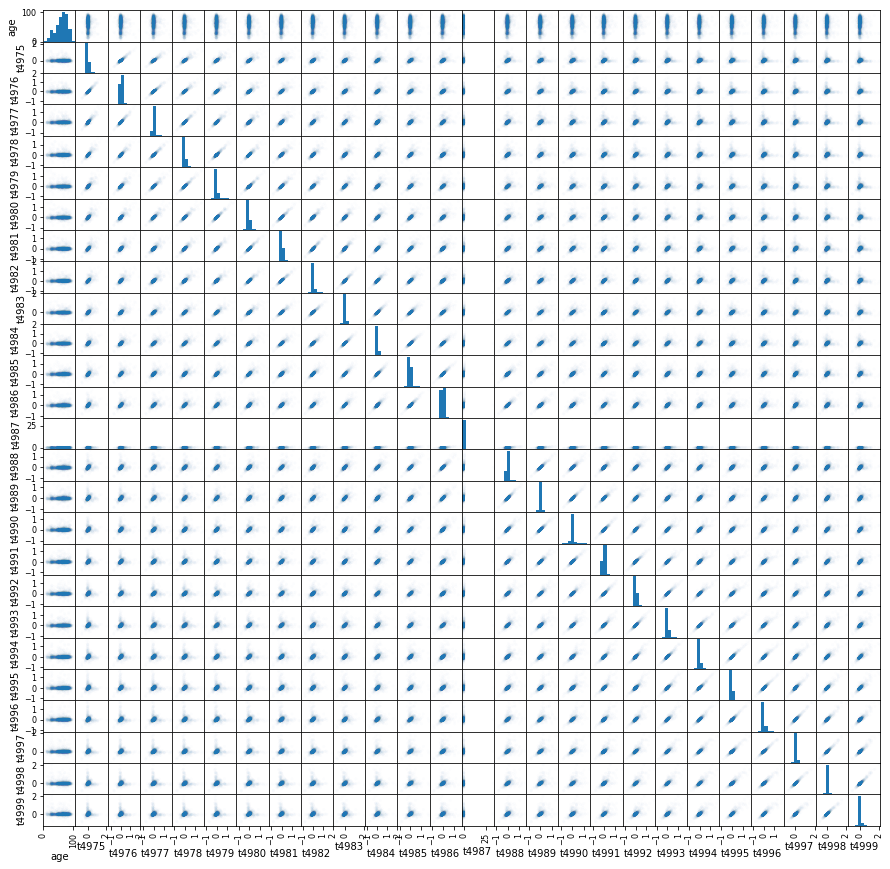

In [0]:
from pandas.plotting import scatter_matrix
modified_data = data.drop(['t{}'.format(i) for i in range(0, 4975)], 1)
scatter_matrix(modified_data, alpha = .01, figsize = (15, 15))
pass

Смотрим корреляцию последних 100 атрибутов:

In [0]:
modified_data = data.drop(['t{}'.format(i) for i in range(0, 4900)], 1)
modified_data.corr()

,age,t4900,t4901,t4902,t4903,t4904,t4905,t4906,t4907,t4908,t4909,t4910,t4911,t4912,t4913,t4914,t4915,t4916,t4917,t4918,t4919,t4920,t4921,t4922,t4923,t4924,t4925,t4926,t4927,t4928,t4929,t4930,t4931,t4932,t4933,t4934,t4935,t4936,t4937,t4938,...,t4960,t4961,t4962,t4963,t4964,t4965,t4966,t4967,t4968,t4969,t4970,t4971,t4972,t4973,t4974,t4975,t4976,t4977,t4978,t4979,t4980,t4981,t4982,t4983,t4984,t4985,t4986,t4987,t4988,t4989,t4990,t4991,t4992,t4993,t4994,t4995,t4996,t4997,t4998,t4999
age,1.000000,0.046345,0.048357,0.048197,0.047941,0.049799,0.051570,0.051989,0.048741,0.048012,0.047169,0.045067,0.043009,0.037309,0.030453,0.029769,0.030246,0.030935,0.029950,0.027832,0.025009,0.022066,0.021409,0.017552,0.014343,0.012545,0.009690,0.006845,0.005132,0.002146,-0.002755,-0.008479,-0.016546,-0.023425,-0.029329,-0.033897,-0.037905,-0.040707,-0.040668,-0.037684,...,-0.035282,-0.037587,-0.040262,-0.038690,-0.034869,-0.034565,-0.036197,-0.034774,-0.032749,-0.033812,-0.037404,-0.039806,-0.038563,-0.036078,-0.034077,-0.035406,-0.035646,-0.035920,-0.037444,-0.041063,-0.039735,-0.031280,-0.022952,-0.013551,-0.000875,0.009737,0.017886,0.022297,0.026553,0.027332,0.027397,0.024523,0.017097,0.007624,-0.005560,-0.021208,-0.033125,-0.041174,-0.047712,-0.051833
t4900,0.046345,1.000000,0.989523,0.962786,0.925343,0.881259,0.831583,0.773299,0.705275,0.630755,0.553946,0.482871,0.421308,0.370199,0.328885,0.299645,0.277220,0.253511,0.230790,0.205607,0.182130,0.158069,0.133627,0.112901,0.096358,0.084870,0.075542,0.067584,0.062684,0.060138,0.056123,0.049938,0.041476,0.033550,0.029368,0.024630,0.022133,0.022779,0.022305,0.023624,...,0.052402,0.052666,0.051405,0.050068,0.050719,0.049382,0.047060,0.045959,0.043444,0.038538,0.034969,0.031538,0.029156,0.027437,0.023328,0.017405,0.010108,0.005622,0.007949,0.009101,0.006851,0.003013,-0.000801,-0.004987,-0.008044,-0.010661,-0.014419,-0.015854,-0.018956,-0.021596,-0.024361,-0.027378,-0.029017,-0.031370,-0.030617,-0.028440,-0.027736,-0.025745,-0.027278,-0.024195
t4901,0.048357,0.989523,1.000000,0.989789,0.963786,0.928181,0.884169,0.828951,0.761564,0.685405,0.605226,0.529770,0.462777,0.407052,0.361744,0.328589,0.302872,0.275902,0.249590,0.221031,0.194774,0.168970,0.143828,0.121995,0.104642,0.092416,0.082090,0.073569,0.068524,0.065386,0.060452,0.053732,0.045147,0.037206,0.032242,0.026517,0.023423,0.023562,0.022421,0.023157,...,0.050654,0.050842,0.049755,0.048588,0.049159,0.048481,0.047542,0.046970,0.044215,0.039027,0.035120,0.032120,0.030079,0.028107,0.023636,0.017932,0.011343,0.006976,0.008775,0.009523,0.007498,0.004107,0.000233,-0.004150,-0.006308,-0.008180,-0.012374,-0.016458,-0.016554,-0.019062,-0.022231,-0.025445,-0.026581,-0.029049,-0.028918,-0.026885,-0.026249,-0.024839,-0.026825,-0.023952
t4902,0.048197,0.962786,0.989789,1.000000,0.990040,0.965102,0.929541,0.881421,0.818988,0.745053,0.664403,0.586060,0.514722,0.454757,0.405035,0.367566,0.338147,0.307337,0.276386,0.243234,0.213052,0.184240,0.157087,0.133672,0.115170,0.101293,0.089621,0.080241,0.074401,0.069912,0.064630,0.057997,0.048925,0.040796,0.034875,0.028267,0.024553,0.024186,0.022463,0.022562,...,0.049460,0.049122,0.048633,0.047392,0.047741,0.047695,0.047708,0.047448,0.044273,0.038772,0.034310,0.031335,0.029683,0.027193,0.021727,0.016355,0.011102,0.006864,0.007639,0.008080,0.006760,0.003817,0.000001,-0.004614,-0.007023,-0.008305,-0.012297,-0.017072,-0.015922,-0.018854,-0.023116,-0.026465,-0.027035,-0.029673,-0.030072,-0.028488,-0.028175,-0.027381,-0.029310,-0.026589
t4903,0.047941,0.925343,0.963786,0.990040,1.000000,0.990500,0.965314,0.926326,0.871270,0.801399,0.722381,0.643541,0.569331,0.506495,0.454173,0.413491,0.380251,0.345206,0.309597,0.271615,0.236535,0.203638,0.173615,0.148064,0.128104,0.112392,0.099286,0.089304,0.082222,0.076344,0.070955,0.064320,0.054731,0.046056,0.039315,0.031850,0.027579,0.027045,0.025459,0.025447,...,0.048752,0.048490,0.048284,0.047459,0.048363,0.048391,0.048290,0.047921,0.044773,0.039679,0.035172,0.031708,0.029895,0.026724,0.020685,0

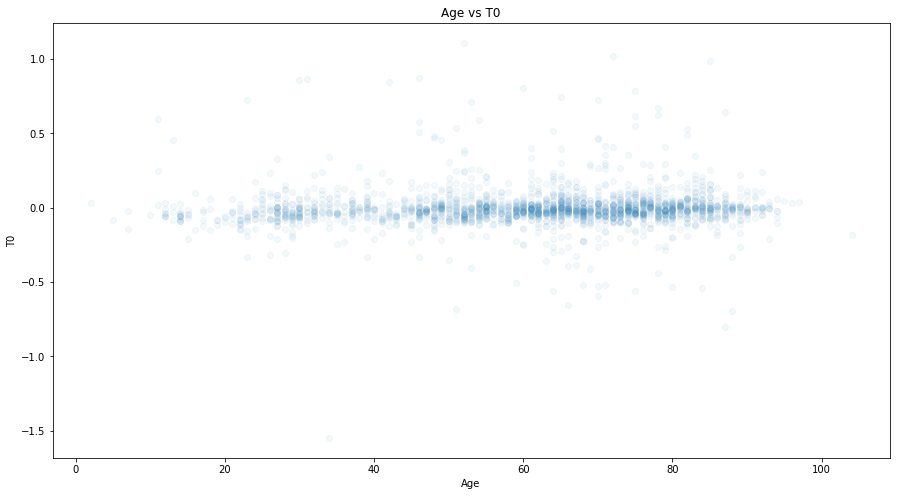

In [0]:
plt.figure(figsize = (15, 8))
plt.plot(data['age'], data['t0'], 'o', alpha = 0.05)
plt.xlabel('Age')
plt.ylabel('T0')
plt.title('Age vs T0')
pass

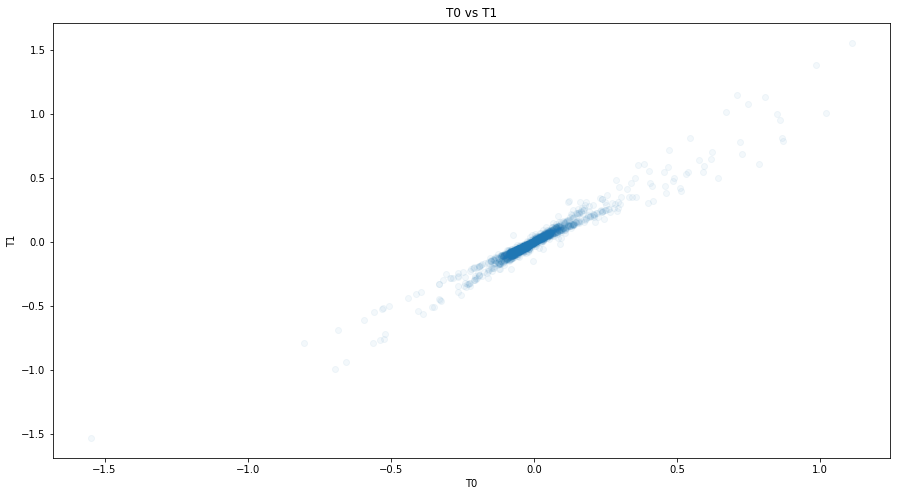

In [0]:
plt.figure(figsize = (15, 8))
plt.plot(data['t0'], data['t1'], 'o', alpha = 0.05)
plt.xlabel('T0')
plt.ylabel('T1')
plt.title('T0 vs T1')
pass

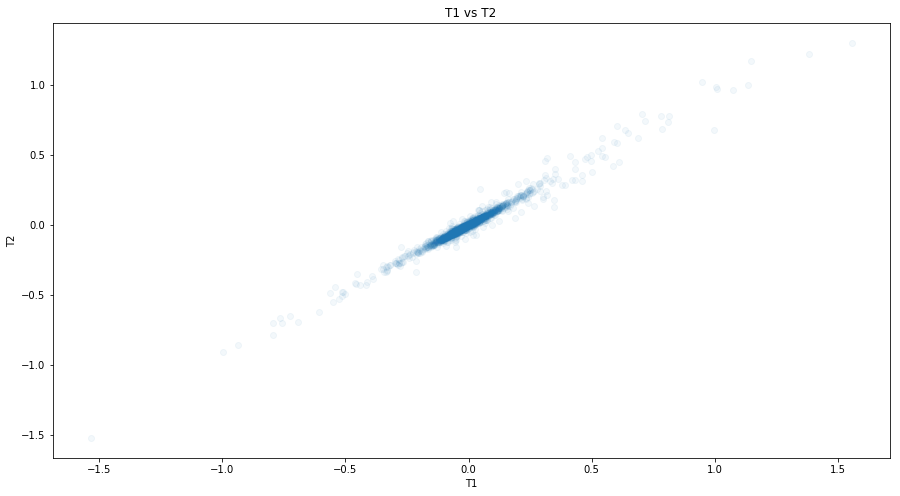

In [0]:
plt.figure(figsize = (15, 8))
plt.plot(data['t1'], data['t2'], 'o', alpha = 0.05)
plt.xlabel('T1')
plt.ylabel('T2')
plt.title('T1 vs T2')
pass

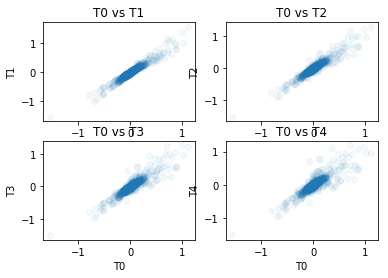

In [0]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(data['t0'], data['t1'], 'o', alpha = 0.05)
axs[0, 0].set_title('T0 vs T1')
axs[0, 0].set(xlabel='T0', ylabel='T1')
axs[0, 1].plot(data['t0'], data['t2'], 'o', alpha = 0.05)
axs[0, 1].set_title('T0 vs T2')
axs[0, 1].set(xlabel='T0', ylabel='T2')
axs[1, 0].plot(data['t0'], data['t3'], 'o', alpha = 0.05)
axs[1, 0].set_title('T0 vs T3')
axs[1, 0].set(xlabel='T0', ylabel='T3')
axs[1, 1].plot(data['t0'], data['t4'], 'o', alpha = 0.05)
axs[1, 1].set_title('T0 vs T4')
axs[1, 1].set(xlabel='T0', ylabel='T4')
pass

По итогу визуализации видно, что первые несколько записанных датчиком ЭКГ значений сильно кореллирруют друг с другом. С течением времени корелляция уменьшается.

In [0]:
data['gender'] == 'Male'

0       False
1       False
2       False
3       False
4       False
5       False
6        True
7        True
8       False
9       False
10      False
11       True
12      False
13      False
14       True
15      False
16      False
17       True
18       True
19       True
20       True
21       True
22       True
23      False
24      False
25       True
26      False
27      False
28       True
29       True
        ...  
1970     True
1971    False
1972     True
1973     True
1974     True
1975     True
1976    False
1977     True
1978     True
1979    False
1980    False
1981    False
1982    False
1983     True
1984     True
1985    False
1986     True
1987    False
1988    False
1989     True
1990    False
1991    False
1992     True
1993    False
1994     True
1995    False
1996    False
1997    False
1998    False
1999    False
Name: gender, Length: 2000, dtype: bool

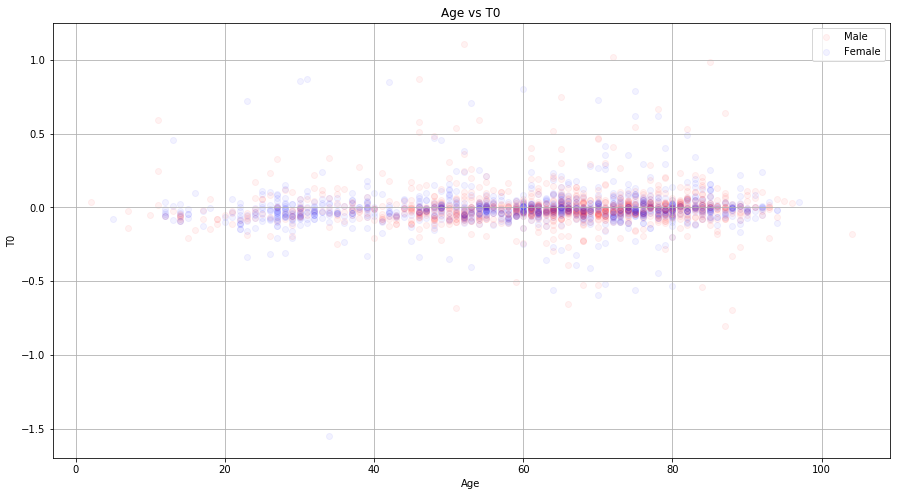

In [0]:
plt.figure(figsize = (15, 8))

plt.scatter(data[data['gender'] == 'Male']['age'],
            data[data['gender'] == 'Male']['t0'],
            alpha = 0.05,
            label = 'Male',
            color = 'r')

plt.scatter(data[data['gender'] == 'Female']['age'],
            data[data['gender'] == 'Female']['t0'],
            alpha = 0.05,
            label = 'Female',
            color = 'b')

plt.xlabel('Age')
plt.ylabel('T0')
plt.title('Age vs T0')
plt.legend()
plt.grid()

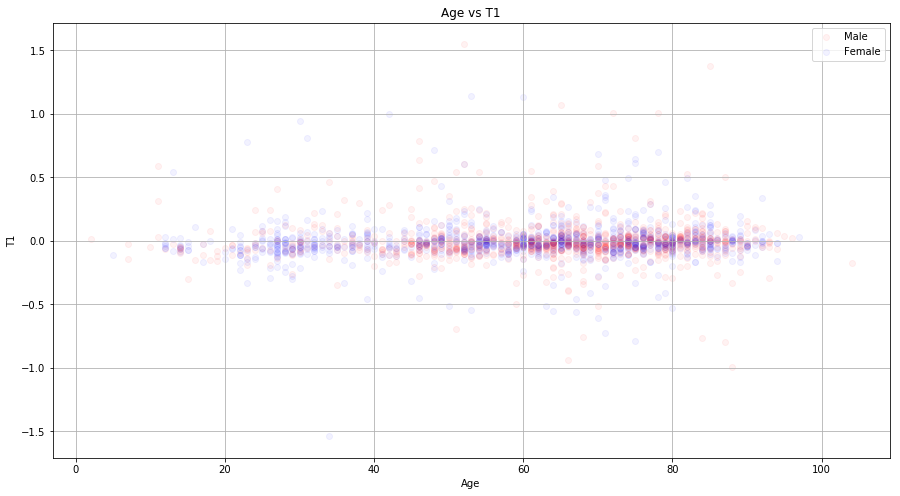

In [0]:
plt.figure(figsize = (15, 8))

plt.scatter(data[data['gender'] == 'Male']['age'],
            data[data['gender'] == 'Male']['t1'],
            alpha = 0.05,
            label = 'Male',
            color = 'r')

plt.scatter(data[data['gender'] == 'Female']['age'],
            data[data['gender'] == 'Female']['t1'],
            alpha = 0.05,
            label = 'Female',
            color = 'b')

plt.xlabel('Age')
plt.ylabel('T1')
plt.title('Age vs T1')
plt.legend()
plt.grid()

In [0]:
data.describe(include = ['object'])

,gender
count,2000
unique,2
top,Male
freq,1048


Видно, что кол-во мужчин и женщин примерно одинаково.

In [0]:
data.describe(include = 'all')

,gender,age,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,...,t4960,t4961,t4962,t4963,t4964,t4965,t4966,t4967,t4968,t4969,t4970,t4971,t4972,t4973,t4974,t4975,t4976,t4977,t4978,t4979,t4980,t4981,t4982,t4983,t4984,t4985,t4986,t4987,t4988,t4989,t4990,t4991,t4992,t4993,t4994,t4995,t4996,t4997,t4998,t4999
count,2000,1997.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1996.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,60.782173,-0.003043,-0.005281,-0.004692,-0.004749,-0.004698,-0.004657,-0.003851,-0.003224,-0.002624,-0.002023,-0.001579,0.014823,-0.001770,0.014213,-0.002583,-0.002924,-0.003228,-0.003181,-0.002821,-0.002256,-0.001829,-0.001349,-0.000754,0.000061,0.000547,0.000613,0.000787,0.000831,0.000817,0.001133,0.001667,0.001675,0.001903,0.002107,0.002462,0.002547,0.002798,0.003609,...,-0.002208,-0.001859,-0.001321,-0.000951,-0.000783,-0.000349,-0.000019,0.000313,0.000956,0.001784,0.002698,0.003116,0.003531,0.003669,0.003309,0.002895,0.002683,0.002297,0.002448,0.002113,0.001482,0.000891,0.000067,-0.000417,-0.000433,-0.000405,-0.000410,0.016025,0.000011,0.000503,0.000629,0.000674,0.001392,0.002175,0.002960,0.004159,0.005326,0.006801,0.008434,0.009169
std,NaN,19.121543,0.136975,0.161146,0.151787,0.156356,0.153504,0.155306,0.155027,0.156807,0.158354,0.160862,0.162761,0.750696,0.163232,0.750523,0.161461,0.160283,0.160407,0.161785,0.163949,0.166227,0.168147,0.170018,0.171947,0.174492,0.177051,0.178870,0.180525,0.182791,0.185389,0.187041,0.186641,0.184547,0.182827,0.182621,0.181788,0.180247,0.179039,0.178367,...,0.150676,0.151400,0.152685,0.153788,0.155773,0.158896,0.162021,0.164773,0.167085,0.168684,0.169203,0.167756,0.165604,0.164186,0.163857,0.164142,0.164935,0.165763,0.166848,0.167011,0.164933,0.161991,0.158698,0.155398,0.152100,0.149605,0.148273,0.746222,0.148818,0.149782,0.150271,0.151570,0.153900,0.156916,0.159809,0.165286,0.169806,0.175520,0.176263,0.180054
min,NaN,2.000000,-1.548534,-1.533534,-1.521534,-1.512534,-1.505534,-1.504534,-1.503534,-1.502534,-1.494534,-1.475534,-1.458534,-1.447534,-1.441534,-1.436534,-1.431534,-1.

Видим, что в колонке age есть пропуски:

In [0]:
data['age'].unique()

array([ 34.,  62.,  76.,  46.,  28.,  55.,  59.,  64.,  74.,  27.,  87.,
        77.,  73.,  68.,  37.,  65.,  82.,  19.,  71.,  78.,  67.,  29.,
        48.,  85.,  75.,  51.,  84.,  61.,  72.,  58.,  86.,  66.,  52.,
        80.,  79.,  92.,  36.,  24.,  89.,  60.,  47.,  nan,  30.,  70.,
        63.,  54.,  50.,  69.,  23.,  39.,  14.,  83.,  42.,  56.,  81.,
        53.,  44.,  93.,  43.,  32.,  38.,  31.,  33.,  45.,  22.,  57.,
        35.,  26.,  20.,  11.,  90.,  15.,  49.,  13.,  25.,  41.,  18.,
        40.,  91.,  17.,  12.,  96.,  88.,   7.,  21.,   2.,  16.,  94.,
       104.,  97.,  95.,   5.,  10.])

Вычисляем медианы для всех колонок:

In [0]:
data.median(axis=0)

age      64.000000
t0       -0.014272
t1       -0.017089
t2       -0.016185
t3       -0.015683
t4       -0.016423
t5       -0.017282
t6       -0.016926
t7       -0.016280
t8       -0.016793
t9       -0.016269
t10      -0.015714
t11      -0.015626
t12      -0.016286
t13      -0.016747
t14      -0.015665
t15      -0.016258
t16      -0.016498
t17      -0.016347
t18      -0.015962
t19      -0.014666
t20      -0.014603
t21      -0.015486
t22      -0.016069
t23      -0.016517
t24      -0.016205
t25      -0.016484
t26      -0.016388
t27      -0.017131
t28      -0.017453
           ...    
t4970    -0.019706
t4971    -0.019202
t4972    -0.018179
t4973    -0.017673
t4974    -0.018961
t4975    -0.019841
t4976    -0.018948
t4977    -0.019667
t4978    -0.019343
t4979    -0.019340
t4980    -0.019261
t4981    -0.019141
t4982    -0.018901
t4983    -0.019173
t4984    -0.018380
t4985    -0.018306
t4986    -0.018189
t4987    -0.018451
t4988    -0.019375
t4989    -0.020165
t4990    -0.019847
t4991    -0.

Заполняем пропущенные медианой соответствующего столбца:

In [0]:
data = data.fillna(data.median(axis = 0), axis = 0)

Проверяем, что все ок:

In [0]:
data['age'].unique()

array([ 34.,  62.,  76.,  46.,  28.,  55.,  59.,  64.,  74.,  27.,  87.,
        77.,  73.,  68.,  37.,  65.,  82.,  19.,  71.,  78.,  67.,  29.,
        48.,  85.,  75.,  51.,  84.,  61.,  72.,  58.,  86.,  66.,  52.,
        80.,  79.,  92.,  36.,  24.,  89.,  60.,  47.,  30.,  70.,  63.,
        54.,  50.,  69.,  23.,  39.,  14.,  83.,  42.,  56.,  81.,  53.,
        44.,  93.,  43.,  32.,  38.,  31.,  33.,  45.,  22.,  57.,  35.,
        26.,  20.,  11.,  90.,  15.,  49.,  13.,  25.,  41.,  18.,  40.,
        91.,  17.,  12.,  96.,  88.,   7.,  21.,   2.,  16.,  94., 104.,
        97.,  95.,   5.,  10.])

Получаем список числовых колонок:

In [0]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']

Бинаризируем колонку gender:

In [0]:
data.at[data['gender'] == 'Male', 'gender'] = 0
data.at[data['gender'] == 'Female', 'gender'] = 1
data['gender'].describe()

count    2000.000000
mean        0.476000
std         0.499549
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

In [0]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,...,t4960,t4961,t4962,t4963,t4964,t4965,t4966,t4967,t4968,t4969,t4970,t4971,t4972,t4973,t4974,t4975,t4976,t4977,t4978,t4979,t4980,t4981,t4982,t4983,t4984,t4985,t4986,t4987,t4988,t4989,t4990,t4991,t4992,t4993,t4994,t4995,t4996,t4997,t4998,t4999
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,60.787000,-0.003043,-0.005281,-0.004692,-0.004749,-0.004698,-0.004657,-0.003851,-0.003224,-0.002624,-0.002023,-0.001579,0.014823,-0.001770,0.014213,-0.002583,-0.002924,-0.003228,-0.003181,-0.002821,-0.002256,-0.001829,-0.001349,-0.000754,0.000061,0.000547,0.000613,0.000787,0.000831,0.000817,0.001133,0.001667,0.001675,0.001903,0.002107,0.002462,0.002547,0.002798,0.003609,0.003918,...,-0.002226,-0.001877,-0.001340,-0.000969,-0.000801,-0.000367,-0.000038,0.000293,0.000935,0.001763,0.002676,0.003093,0.003510,0.003648,0.003286,0.002873,0.002661,0.002275,0.002426,0.002092,0.001462,0.000871,0.000048,-0.000436,-0.000451,-0.000423,-0.000428,0.015991,-0.000008,0.000483,0.000608,0.000653,0.001371,0.002153,0.002939,0.004137,0.005302,0.006776,0.008408,0.009111
std,19.107595,0.136975,0.161146,0.151787,0.156356,0.153504,0.155306,0.155027,0.156807,0.158354,0.160862,0.162761,0.750696,0.163232,0.750523,0.161461,0.160283,0.160407,0.161785,0.163949,0.166227,0.168147,0.170018,0.171947,0.174492,0.177051,0.178870,0.180525,0.182791,0.185389,0.187041,0.186641,0.184547,0.182827,0.182621,0.181788,0.180247,0.179039,0.178367,0.177652,...,0.150602,0.151326,0.152609,0.153712,0.155696,0.158818,0.161941,0.164692,0.167003,0.168601,0.169120,0.167674,0.165522,0.164106,0.163777,0.164062,0.164854,0.165682,0.166766,0.166928,0.164852,0.161911,0.158620,0.155321,0.152025,0.149531,0.148200,0.745850,0.148745,0.149708,0.150197,0.151495,0.153825,0.156839,0.159731,0.165205,0.169723,0.175434,0.176177,0.179878
min,2.000000,-1.548534,-1.533534,-1.521534,-1.512534,-1.505534,-1.504534,-1.503534,-1.502534,-1.494534,-1.475534,-1.458534,-1.447534,-1.441534,-1.436534,-1.431534,-1.422534,-1.410534,-1.396534,-1.377534,-1.347534,-1.318534,-1.297534,-1.288534,-1.292534,-1.299534,-1.307534,-1.303534,-1.285534,-1.256534,-1.219534,-1.186534,-1.169534,-1.164534,-1.166534,-1.170534,-1.178554,-1.216181,-1.260816,-1.298081,...,-1.091365,-1.092962,-1.081818,-1.082325,-1.092267,-1.094301,-1.181069,-1.337829,-1.476951,-1.556771,-1.594704,-1.579733,-1.536673,-1.499597,-1.450177,-1.390587,-1.322480,-1.242039,-1.140882,-1.140459,-1.155086,-1.145562,-1.132564,-1.137546,-1.145342,-1.145282,-1.151132,-1.157682,-1.165593,-1.180648,-1.193288,-1.186256,-1.144057,-1.105981,-1.084433,-1.127472,-1.115263,-1.148929,-1.089428,-1.210832
25%,49.000000,-0.050824,-0.060345,-0.057559,-0.060378,-0.058967,-0.059664,-0.058049,-0.059033,-0.058744,-0.058993,-0.059004,-0.059189,-0.059501,-0.058558,-0.060040,-0.059103,-0.057442,-0.057705,-0.058090,-0.058102,-0.058036,-0.058329,-0.057249,-0.057368,-0.058103,-0.057925,-0.060081,-0.059223,-0.059275,-0.058207,-0.056616,-0.058179,-0

Нормализуем числовые признаки:

In [0]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data[numerical_columns] = data_numerical

In [0]:
data

,gender,age,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,...,t4960,t4961,t4962,t4963,t4964,t4965,t4966,t4967,t4968,t4969,t4970,t4971,t4972,t4973,t4974,t4975,t4976,t4977,t4978,t4979,t4980,t4981,t4982,t4983,t4984,t4985,t4986,t4987,t4988,t4989,t4990,t4991,t4992,t4993,t4994,t4995,t4996,t4997,t4998,t4999
0,1,-1.401903,0.222215,0.151447,0.089996,-0.078592,-0.124420,-0.066112,-0.233103,-0.274520,-0.170426,-0.216289,-0.436290,-0.118004,-0.469763,-0.154613,-0.644481,-0.629307,-0.547185,-0.588934,-0.493706,-0.484447,-0.659439,-0.821209,-0.690452,-0.595343,-0.624066,-0.595310,-0.536815,-0.627001,-0.748979,-0.483884,-0.509909,-0.492812,-0.394374,-0.221376,-0.252749,-0.290042,-0.168229,0.074287,...,0.063705,-0.021147,0.025576,0.038498,-0.060035,-0.124145,-0.105141,-0.131127,-0.144356,-0.157992,-0.262680,-0.233098,-0.386501,-0.476488,-0.186506,-0.134117,-0.318049,-0.388898,-0.463424,-0.403843,-0.313089,-0.399976,-0.417448,-0.435053,-0.682603,-0.449401,-0.438255,-0.086084,-0.229240,-0.300688,-0.352777,-0.241223,-0.183293,-0.563987,-0.522628,-0.153707,-0.169067,-0.387079,-0.419437,-0.331017
1,1,0.063483,-0.216957,-0.276686,-0.235858,-0.205941,-0.208376,-0.202897,-0.148981,-0.131507,-0.139940,-0.164021,-0.138677,-0.048238,-0.120537,-0.040917,-0.068804,-0.073307,-0.037871,0.001406,-0.012550,0.054300,0.077580,-0.002967,0.026723,0.092739,0.102134,0.114971,0.168538,0.182564,0.214398,0.245037,0.282689,0.298980,0.376448,0.409354,0.392335,0.438338,0.496558,0.507728,...,-0.529689,-0.547833,-0.547754,-0.529887,-0.536329,-0.516519,-0.536177,-0.565245,-0.514169,-0.493896,-0.526203,-0.522918,-0.487515,-0.548305,-0.602972,-0.572676,-0.546455,-0.522142,-0.524052,-0.562661,-0.572394,-0.541682,-0.534614,-0.636888,-0.736041,-0.843380,-0.908802,-0.202644,-0.859302,-0.904000,-0.911049,-0.794307,-0.705434,-0.639957,-0.410183,0.026443,0.598686,1.197293,1.931688,2.783359
2,1,0.796176,-0.752558,-0.631998,-0.694609,-0.680347,-0.706342,-0.704850,-0.711314,-0.688113,-0.666231,-0.628502,-0.593173,-0.143797,-0.541280,-0.135023,-0.511216,-0.519083,-0.523021,-0.531219,-0.538604,-0.540638,-0.537003,-0.533916,-0.531391,-0.522576,-0.506474,-0.490507,-0.486977,-0.470237,-0.452788,-0.445133,-0.438230,-0.437825,-0.432253,-0.433859,-0.437797,-0.453107,-0.474326,-0.503084,...,-0.178605,-0.193274,-0.201722,-0.215697,-0.214027,-0.218853,-0.229014,-0.215054,-0.221909,-0.230649,-0.241252,-0.245822,-0.263616,-0.278918,-0.289485,-0.286461,-0.259536,-0.243839,-0.219171,-0.198984,-0.179472,-0.160552,-0.127178,-0.107445,-0.096521,-0.091629,-0.072179,-0.033674,-0.047844,-0.050813,-0.044826,-0.051336,-0.055231,-0.059155,-0.069261,-0.092379,-0.114460,-0.130536,-0.144922,-0.162530
3,1,-0.773881,0.028722,0.040638,0.038472,0.038133,0.038246,0.037705,0.032471,0.028165,0.024065,0.019971,0.017005,-0.018162,0.018127,-0.017354,0.023358,0.025659,0.027534,0.027011,0.024457,0.020722,0.017945,0.014927,0.011296,0.006465,0.003624,0.003219,0.002224,0.001958,0.002002,0.000295,-0.002564,-0.002634,-0.003908,-0.005031,-0.007004,-0.007536,-0.008992,-0.013571,...,0.507186,0.673452,0.694662,0.634254,0.598252,0.594009,0.627914,0.681535,0.648755,0.534878,0.518491,0.602895,0.595915,0.489614,0.555581,0.694417,0.695457,0.619385,0.567102,0.627728,0.753926,0.823173,0.790793,0.607934,0.542069,0.584333,0.587929,0.112468,0.651383,0.701633,0.688077,0.538642,0.520335,0.590655,0.634448,0.575954,0.529647,0.537710,0.492526,0.275567
4,1,-1.715915,-0.383245,-0.428602,-0.390734,-0.410582,-0.380034,-0.339409,-0.365551,-0.413656,-0.452108,-0.425947,-0.350624,-0.099970,-0.396965,-0.132862,-0.665101,-0.609574,-0.557624,-0.352961,0.082340,0.584123,0.930559,1.169960,1.493796,1.844113,2.283315,2.697477,3.043299,3.492637,3.946627,4.082643,3.771838,3.297204,2.741608,2.060641,1.431863,0.945832,0.577675,0.254328,...,0.353125,0.321578,0.278787,0.244237,0.205075,0.171840,0.158223,0.141732,0.139760,0.146786,0.095282,0.089999,0.074051,-0.001142,-0.013

Разбиваем фрейм на входы и выходы:

In [0]:
X = data.drop('gender', axis = 1)
y = data['gender']

In [0]:
print(X.shape)
print(y.shape)
N, d = X.shape

(2000, 5001)
(2000,)


Разбиваем данные на обучающую и тестовую выборки:

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1400 600


Используем метод 5 ближайших соседей:

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test  != y_test_predict)

In [0]:
err_test

0.4716666666666667

In [0]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[198 116]
 [167 119]]


Определяем наилучшее кол-во соседей:

In [0]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.4692857142857143 25


Смотрим итоговую ошибку на обучающих и тестовых данных:

In [0]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.3692857142857143 0.475


Можно сделать вывод, что задачу можно решить с точностью, которая очень близка к точности угадывания. Вероятность праильного ответа при использовании метода 25 ближайших соседей - 52.5% на тестовой выборке.